In [1]:
import pandas as pd
import numpy as np

import utils

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

# Ravel Black/White

## GG97 OTU

In [2]:
task = 'Ravel Black/White GG97 OTU'
folder = 'ravel-black-white'

In [3]:
num_features = 1095
weights = (1, -1)

In [4]:
df1 = pd.read_csv('./'+folder+'/KLKFKD_ravel_20210215_20_59_32/best_test.csv', sep=';') # NoRel+NoCLR
df2 = pd.read_csv('./'+folder+'/BTNJB5_ravel_20210215_21_01_26/best_test.csv', sep=';') # Rel+NoCLR
df3 = pd.read_csv('./'+folder+'/KWYT7N_ravel_20210215_22_01_47/best_test.csv', sep=';') # NoRel+CLR

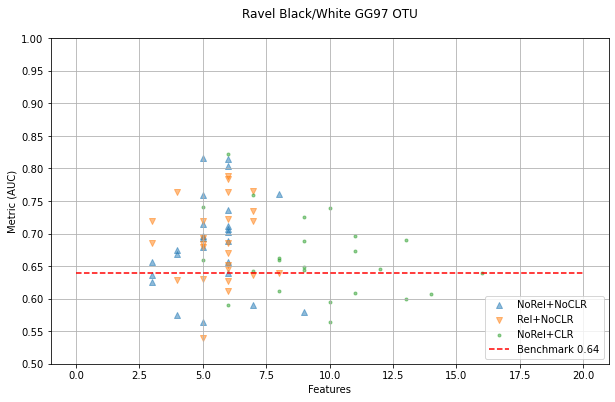

In [6]:
utils.plot(df1, df2, df3, 'num_genes', 'metric', num_features, weights, title=task, subtitle='', baseline=0.64, filename='./plots/ravel_black_whites_gg97_otu.png', xmax=20, ylim=(0.5, 1.001))

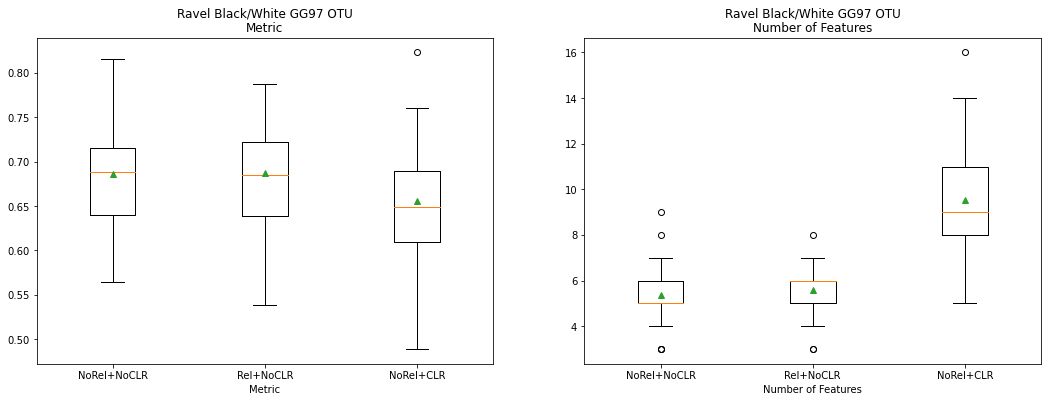

In [7]:
utils.boxplot(df1, df2, df3, num_features, weights, task, filename='./plots/ravel_black_white_boxplot_refseq_otu.png')

In [9]:
d = {
    'NoRel+NoCLR': utils.all(df1, num_features, weights).sort_values('metric', ascending=False),
    'Rel+NoCLR': utils.all(df2, num_features, weights).sort_values('metric', ascending=False),
    'NoRel+CLR': utils.all(df3, num_features, weights).sort_values('metric', ascending=False)
}

---

In [10]:
import sys 
sys.path.append('../src')

import dataset
import config
import run_best_features
from tasks import *

import ast

In [11]:
n = 100

In [12]:
# Experiment 1

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''

data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data1, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (200, 1095)


In [13]:
# Experiment 2

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_gg_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''

data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'Rel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data2, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (200, 1095)


In [15]:
# Experiment 3

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'

data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+CLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data3, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (200, 1095)


In [16]:
d['NoRel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
15,8,6,0.804,0.799,"[20, 115, 133, 401, 698, 1039]",0.799,0.799,"[0.835, 0.736, 0.806, 0.65, 0.818, 0.848, 0.78...",0.744,0.602,0.904,0.063
1,1,4,0.669,0.665,"[20, 115, 127, 1039]",0.665,0.665,"[0.673, 0.69, 0.88, 0.778, 0.77, 0.746, 0.69, ...",0.743,0.521,0.931,0.071
24,12,6,0.707,0.702,"[3, 20, 115, 698, 785, 1039]",0.702,0.702,"[0.718, 0.779, 0.722, 0.833, 0.648, 0.801, 0.7...",0.733,0.562,0.854,0.062
2,2,5,0.564,0.559,"[3, 20, 115, 144, 1039]",0.559,0.559,"[0.652, 0.742, 0.739, 0.716, 0.695, 0.79, 0.58...",0.732,0.516,0.945,0.075
9,5,6,0.688,0.683,"[3, 130, 138, 144, 941, 1039]",0.683,0.683,"[0.764, 0.821, 0.756, 0.632, 0.748, 0.726, 0.7...",0.730,0.576,0.895,0.065


In [17]:
d['Rel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
29,22,6,0.685,0.680,"[20, 115, 141, 375, 476, 1039]",0.680,0.680,"[0.66, 0.753, 0.752, 0.848, 0.813, 0.822, 0.64...",0.753,0.549,0.905,0.063
23,16,6,0.670,0.665,"[130, 141, 375, 474, 1039, 1072]",0.665,0.665,"[0.781, 0.629, 0.744, 0.706, 0.828, 0.715, 0.7...",0.738,0.578,0.887,0.067
28,21,7,0.734,0.728,"[20, 115, 127, 144, 476, 651, 778]",0.728,0.728,"[0.646, 0.716, 0.739, 0.729, 0.85, 0.734, 0.71...",0.736,0.530,0.888,0.070
10,8,5,0.680,0.675,"[115, 127, 144, 476, 987]",0.675,0.675,"[0.837, 0.635, 0.639, 0.777, 0.757, 0.682, 0.7...",0.733,0.596,0.883,0.068
2,1,6,0.788,0.783,"[20, 115, 136, 161, 768, 1039]",0.783,0.783,"[0.888, 0.847, 0.688, 0.63, 0.611, 0.757, 0.81...",0.726,0.481,0.944,0.076


In [18]:
d['NoRel+CLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
22,17,11,0.696,0.686,"[37, 115, 138, 266, 356, 627, 679, 688, 698, 9...",0.686,0.686,"[0.771, 0.689, 0.763, 0.7, 0.693, 0.74, 0.596,...",0.703,0.564,0.891,0.069
30,23,9,0.649,0.641,"[37, 72, 107, 133, 134, 368, 421, 892, 1039]",0.641,0.641,"[0.706, 0.595, 0.757, 0.751, 0.732, 0.679, 0.7...",0.700,0.469,0.840,0.069
28,22,13,0.599,0.587,"[6, 127, 138, 325, 351, 421, 809, 879, 880, 90...",0.587,0.587,"[0.787, 0.818, 0.642, 0.624, 0.774, 0.603, 0.5...",0.696,0.536,0.822,0.068
23,18,8,0.660,0.653,"[4, 5, 115, 130, 278, 679, 769, 879]",0.653,0.653,"[0.695, 0.742, 0.534, 0.689, 0.695, 0.579, 0.7...",0.695,0.531,0.902,0.079
0,0,6,0.823,0.818,"[101, 115, 473, 627, 698, 843]",0.818,0.818,"[0.713, 0.778, 0.634, 0.585, 0.758, 0.699, 0.6...",0.691,0.534,0.861,0.067


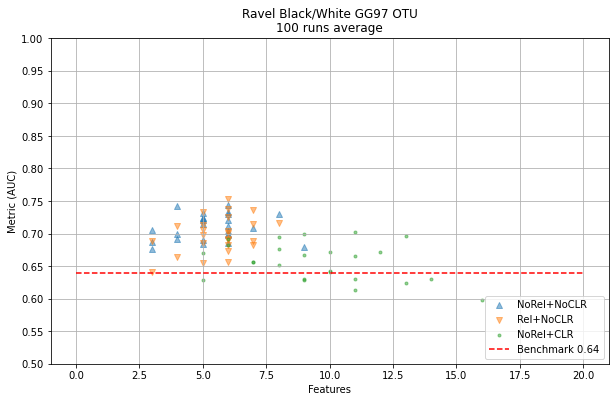

In [19]:
utils.plot(d['NoRel+NoCLR'], d['Rel+NoCLR'], d['NoRel+CLR'], 'num_genes', 'avg_n', num_features, weights, title=task, subtitle='100 runs average', baseline=0.64, filename='./plots/ravel_black_white_gg97_otu_avg_n.png', xmax=20, ylim=(0.5, 1.001))

---

In [4]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('../src')

import utils

import dataset
import config
import run_best_features
from tasks import *

import ast

In [5]:
folder = 'ravel-black-white'
top_n = 5
n = 100

stats = {
    'NoRel+NoCLR': pd.read_csv('./'+folder+'/stats_gg_NoRel+NoCLR.tsv', sep='\t'),
    'Rel+NoCLR': pd.read_csv('./'+folder+'/stats_gg_Rel+NoCLR.tsv', sep='\t'),
    'NoRel+CLR': pd.read_csv('./'+folder+'/stats_gg_NoRel+CLR.tsv', sep='\t'),
}

best_n = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

In [6]:
config.DATA_PARAMS['task'] = vaginal['ravel_white_black_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''
data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+NoCLR'], i)
    res = run_best_features.run(config, data1, top_n_features, n)
    best_n['NoRel+NoCLR'].append(np.round(np.mean(res), 3))

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_gg_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''
data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['Rel+NoCLR'], i)
    res = run_best_features.run(config, data2, top_n_features, n)
    best_n['Rel+NoCLR'].append(np.round(np.mean(res), 3))

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'
data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+CLR'], i)
    res = run_best_features.run(config, data3, top_n_features, n)
    best_n['NoRel+CLR'].append(np.round(np.mean(res), 3))

Final dataset shape: (200, 1095)
Final dataset shape: (200, 1095)
Final dataset shape: (200, 1095)


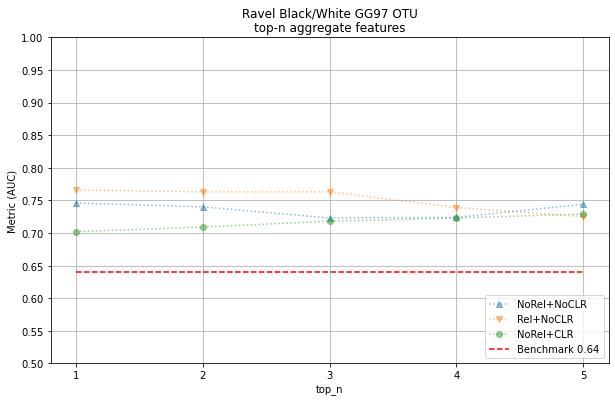

In [7]:
utils.plot_nruns_topn(best_n, title=task, subtitle='top-n aggregate features', baseline=0.64, filename='./plots/ravel_black_white_nruns_topn_refseq_otu.png', xmax=(top_n-1), ylim=(0.5, 1.0001), top_n=top_n)

In [8]:
best_n

{'NoRel+NoCLR': [0.746, 0.74, 0.723, 0.724, 0.744],
 'Rel+NoCLR': [0.766, 0.763, 0.763, 0.739, 0.725],
 'NoRel+CLR': [0.702, 0.709, 0.718, 0.723, 0.729]}

---

In [9]:
import importlib
importlib.reload(run_best_features)
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\mikel\\Documents\\MScAI\\Sem4\\proposal-draft\\microbiome\\microbiome-analysis\\output\\utils.py'>

In [10]:
experiment = 'NoRel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)
_ = run_best_features.run(config, data1, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
       4429907      0.0981    []
       1016547      0.1311    ['k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Corynebacteriaceae; g__Corynebacterium; s__']
        268507      0.1557    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__Peptoniphilus; s__asaccharolyticus']
        930873      0.1793    []
        114964      0.1823    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__vaginalis']
        133372      0.2536    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__; s__']



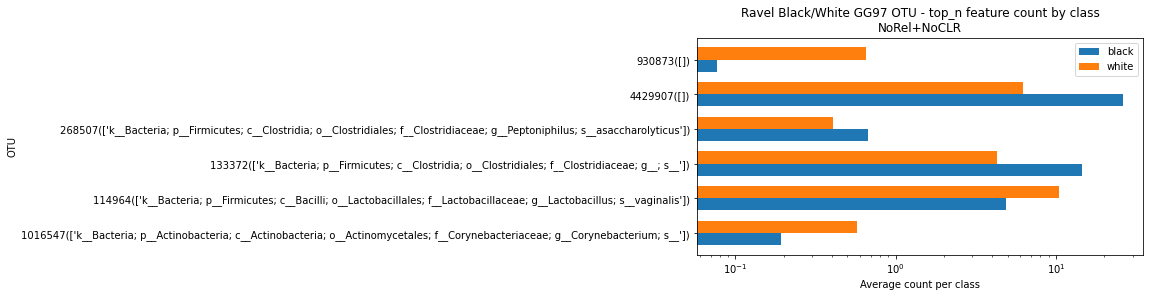

In [11]:
features = data1.features[top_n_features]
filename = f'./plots/ravel_black_white_features_by_class_{experiment}_gg_otu.png'
utils.plot_features_per_class(data1, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('black', 'white'), figsize=(8,4), filename=filename, clean_otu=False)

In [12]:
experiment = 'Rel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

_ = run_best_features.run(config, data2, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
        347922      0.1365    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__']
        258882      0.1373    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Gemellales; f__Gemellaceae; g__Gemella; s__']
        114964      0.1488    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__vaginalis']
        930873      0.1743    []
       1016547      0.1972    ['k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Corynebacteriaceae; g__Corynebacterium; s__']
        225846      0.2058    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Veillonellaceae; g__; s__']



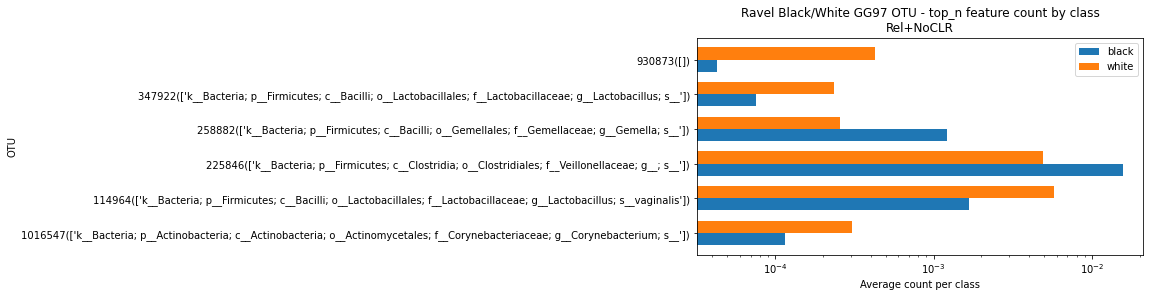

In [13]:
features = data2.features[top_n_features]
filename = f'./plots/ravel_black_white_features_by_class_{experiment}_gg_otu.png'
utils.plot_features_per_class(data2, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('black', 'white'), figsize=(8,4), filename=filename, clean_otu=False)

In [14]:
experiment = 'NoRel+CLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

_ = run_best_features.run(config, data3, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
        577170      0.0361    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Bacteroides; s__']
        589114      0.0422    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__']
        134786      0.0484    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__Anaerococcus; s__']
       4377809       0.05     []
        578911      0.0533    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Exiguobacterales; f__Exiguobacteraceae; g__Exiguobacterium; s__indicum']
        469663      0.0553    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Coriobacteriales; f__Coriobacteriaceae; g__; s__']
       1086889      0.0564    []
        114964      0.0723    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__vaginalis']
        133372      0.075     ['k__Bacteria; p__Firmicut

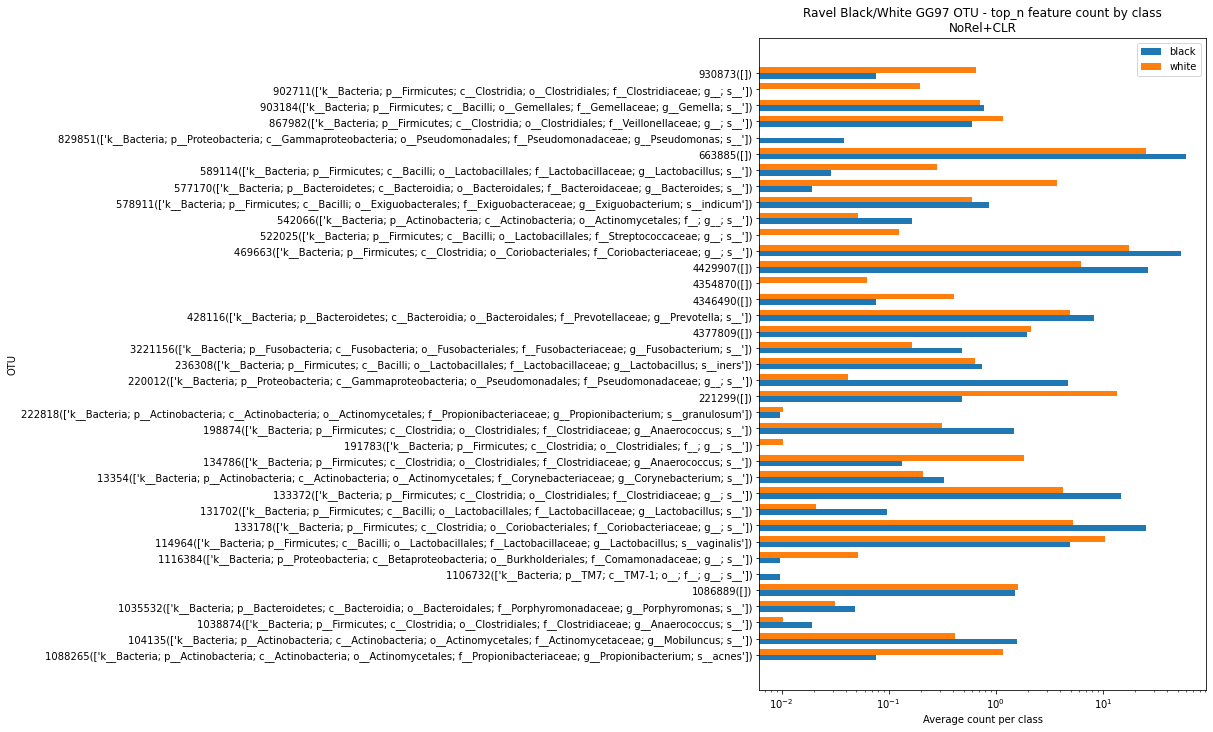

In [15]:
features = data3.features[top_n_features]
filename = f'./plots/ravel_black_white_features_by_class_{experiment}_gg_otu.png'
utils.plot_features_per_class(data3, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('black', 'white'), figsize=(8,12), filename=filename, clean_otu=False)